In [11]:
import sympy as sp
import numpy as np
import scipy as sc
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import special

from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [12]:
x,y,k,n = sp.symbols('x y k n')

gr = 9.81
L = 5
h = 6.62*10**(-34)
m = 9.11*10**(-27)
m =  1

alpha = (2*m**2*gr/h**2)**(1/3)

f = sp.Function('f')

f = sp.sqrt(2/L) *sp.sin(k*sp.pi*x/L)

f_n = sp.lambdify([x,k], f, 'numpy')

In [13]:
# golffunctie/ probabiliteit dichtheid voor de hoogte y voor verschillende n

In [14]:
print('De distributiefunctie moet zelf geen waarden < 1 aannemen. Wat je hier wel kan aflezen is dat op plaatsen waar de functie een hoge waarde aanneemt, de kans om het deeltje te vinden ook groot zal zijn. Heeft te maken met verschil tussen CDF en PDF')

De distributiefunctie moet zelf geen waarden < 1 aannemen. Wat je hier wel kan aflezen is dat op plaatsen waar de functie een hoge waarde aanneemt, de kans om het deeltje te vinden ook groot zal zijn. Heeft te maken met verschil tussen CDF en PDF


In [15]:
'Dit is verwarrend. Zie https://www.quora.com/How-does-one-interpret-probability-density-greater-than-one-What-is-the-physical-significance-of-probability-density-Is-it-just-a-mathematical-tool#:~:text=There%20is%20nothing%20special%20about,curve%20is%20equal%20to%201. Of: https://www.google.be/search?sxsrf=ALeKk01-nk_JDY4IU4ciIgLL_5p0QdreQA%3A1595857342731&ei=vtkeX_SCLMuzsAev2KC4Ag&q=probability+density+greater+than+1&oq=probability+density+greather&gs_lcp=CgZwc3ktYWIQAxgAMgQIABATMgoIABAIEA0QHhATMgoIABAIEA0QHhATMgoIABAIEA0QHhATMgoIABAIEA0QHhATMgoIABAIEA0QHhATOgQIABBHOgQIIxAnOgUIABDLAToGCAAQFhAeOgQIABANOgYIABANEB46CAgAEA0QBRAeUMgUWMEnYPo9aAFwAXgAgAFViAGEB5IBAjEymAEAoAEBqgEHZ3dzLXdpesABAQ&sclient=psy-ab'

'Dit is verwarrend. Zie https://www.quora.com/How-does-one-interpret-probability-density-greater-than-one-What-is-the-physical-significance-of-probability-density-Is-it-just-a-mathematical-tool#:~:text=There%20is%20nothing%20special%20about,curve%20is%20equal%20to%201. Of: https://www.google.be/search?sxsrf=ALeKk01-nk_JDY4IU4ciIgLL_5p0QdreQA%3A1595857342731&ei=vtkeX_SCLMuzsAev2KC4Ag&q=probability+density+greater+than+1&oq=probability+density+greather&gs_lcp=CgZwc3ktYWIQAxgAMgQIABATMgoIABAIEA0QHhATMgoIABAIEA0QHhATMgoIABAIEA0QHhATMgoIABAIEA0QHhATMgoIABAIEA0QHhATOgQIABBHOgQIIxAnOgUIABDLAToGCAAQFhAeOgQIABANOgYIABANEB46CAgAEA0QBRAeUMgUWMEnYPo9aAFwAXgAgAFViAGEB5IBAjEymAEAoAEBqgEHZ3dzLXdpesABAQ&sclient=psy-ab'

<IPython.core.display.Javascript object>


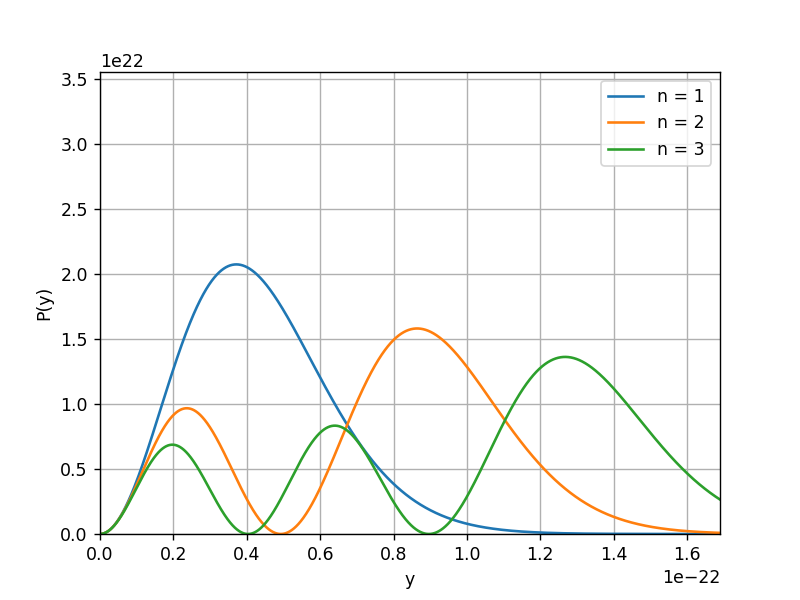

In [16]:
fig, ax = plt.subplots(1,1)

aantaly = 3

ax.set_xlim([0, 2*aantaly/alpha])
ax.set_ylim([0,alpha])

for i in range(1,aantaly+1):
        y = np.linspace(0, 2*aantaly/alpha, 20000)
        a = sc.special.ai_zeros(i)
        a = a[0][i-1]
        ai, aip, bi, bip = special.airy(a)
        Normeer = np.sqrt(alpha/aip**2)
        ai, aip, bi, bip = special.airy(alpha*y + a)
        ai = ai*Normeer
        ax.plot(y,ai**2, label = 'n = ' + str(i)) # moet zelf niet < 1; enkel de oppervlakte eronder moet = 1

plt.grid(True)
plt.legend()
plt.xlabel('y')
plt.ylabel('P(y)')

plt.show()

In [17]:
# golffunctie/probabiliteit voor de horizontale verplaatsing x voor verschillende m

<IPython.core.display.Javascript object>


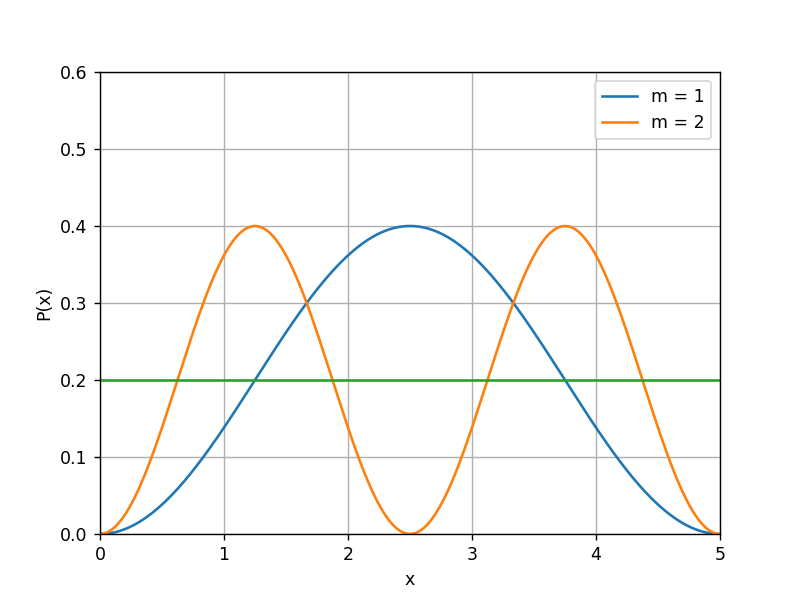

In [18]:
fig, ax = plt.subplots(1,1)

aantalx = 2

opsplitsen = 200

for i in range(1,aantalx+1):
    x = np.linspace(0, L, opsplitsen)
    ax.plot(x,f_n(x,i)**2, label = 'm = '+ str(i)) # moet zelf niet < 1; enkel de oppervlakte eronder moet = 1
convergentie = np.linspace(1/L, 1/L, opsplitsen)
ax.plot(x,convergentie)
ax.set_xlim([0, L])
ax.set_ylim([0,3/L])

plt.grid(True)
plt.legend()

plt.xlabel('x')
plt.ylabel('P(x)')

plt.show()

In [19]:
# X en Y samengevoegd

<IPython.core.display.Javascript object>


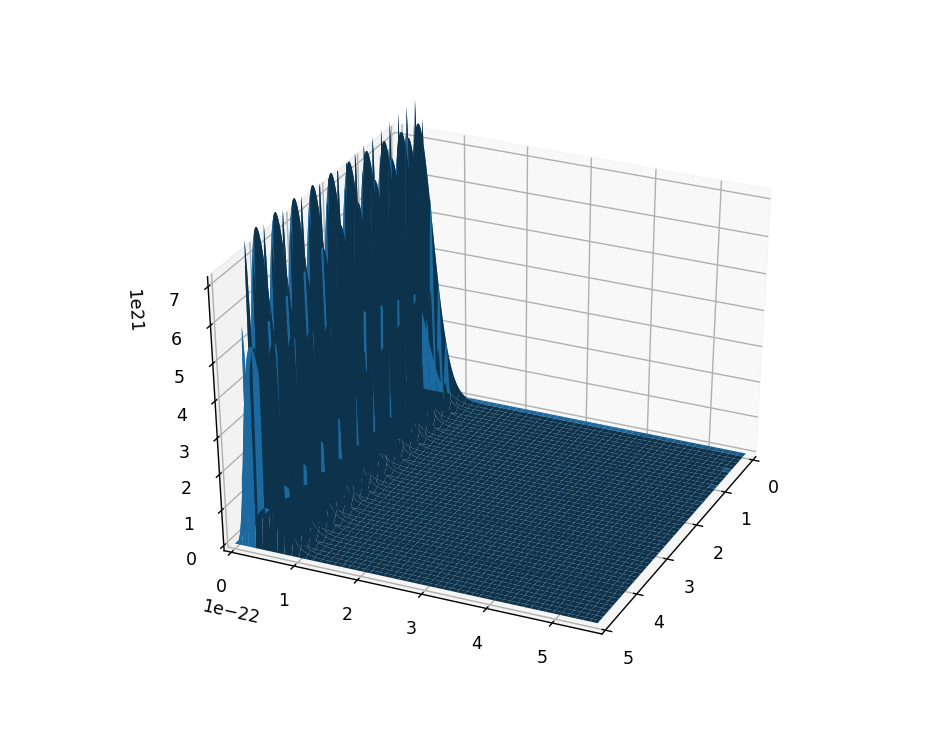

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 1
m = 20

afstandy = 20/alpha # steeds delen door alpha voor correcte eenheden

def z_func(x,y,n,m):
    a = sc.special.ai_zeros(n)
    a = a[0][n-1]
    ai, aip, bi, bip = special.airy(a)
    Normeer = np.sqrt(alpha/aip**2)
    ai, aip, bi, bip = special.airy(alpha*y + a)
    ai = ai*Normeer
    
    return (f_n(x,m)*ai)**2

x = np.linspace(0, L, 200)
y = np.linspace(0, afstandy, 20000)

X,Y = np.meshgrid(x, y) # grid of point
Z = z_func(X, Y,n,m) # evaluation of the function on the grid

ax.set_xlim(0,L)
ax.set_ylim(0,afstandy)
ax.set_zlim(0,alpha/5)

surf = ax.plot_surface(X, Y, Z)


plt.show()